In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import os
import glob

2023-03-28 09:53:59.762983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 09:53:59.818657: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-28 09:53:59.820516: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dylan/miniconda3/envs/extract_face_sq/lib/python3.10/site-packages/cv2/../../lib64:
2023

In [2]:
def read_img_path(input_folder):
    """
    Read only images from input_folder and return a list of image paths,
    Take in jpg, JPG, jpeg, JPEG, png, PNG, bmp, BMP
    Exclude subfolders

    Args:
        input_folder (str): input image folder
    """
    img_paths = glob.glob(input_folder + "/*")
    img_paths = [path for path in img_paths if os.path.isfile(path)]
    img_paths = [
        path
        for path in img_paths
        if path.lower().endswith((".jpg", ".jpeg", ".png", ".bmp"))
    ]
    return img_paths

In [3]:
def split_filename(path):
    """
    Split the filename from the path
    return path and filename and extension

    Args:
        path (str): input image path
    """
    import os

    pathname, filename = os.path.split(path)
    filename, ext = os.path.splitext(filename)
    return pathname, filename, ext

In [4]:
def convert_sq(x, y, w, h, scale=1):
    """Convert the detected rectangle to a square and
    return the coordinates of the square.
    Scale allows flexibility to expand/decrease the range of detected square region.

    Args:
        x (_type_): x-coordinate of the top-left corner
        y (_type_): y-coordinate of the top-left corner
        w (_type_): width
        h (_type_): height
        scale (int, optional): Expand/decrease the range of detected square region. Defaults to 1.

    Returns:
        x1, y1, x2, y2: return the coordinates of the square
    """

    cx = x + w // 2
    cy = y + h // 2
    cr = max(w, h) // 2

    r = cr * scale
    # cv2.rectangle(canvas, (cx-r, cy-r), (cx+r, cy+r), (0,255,0), 1)
    # croped = img[cy-r:cy+r, cx-r:cx+r]
    # cv2.imshow("croped{}".format(i), croped)

    x1, y1 = cx - r, cy - r
    x2, y2 = cx + r, cy + r

    return x1, y1, x2, y2

In [5]:
def resize_save_image(img_obj, img_path):
    """Resize and save image

    Args:
        img_obj (deepface obj): deepface object
        img_path (str): input image path
    """
    for i in range(len(img_obj)):
        x = img_obj[i]["facial_area"]["x"]
        y = img_obj[i]["facial_area"]["y"]
        w = img_obj[i]["facial_area"]["w"]
        h = img_obj[i]["facial_area"]["h"]

        x1, y1, x2, y2 = convert_sq(x, y, w, h, 2)

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # image1 = cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 5)
        crop_img = image[y1:y2, x1:x2]

        # Resize image
        img_resized = cv2.resize(crop_img, (512, 512))
        plt.imshow(img_resized)
        plt.show()
        # Save image
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

        pathname, filename, ext = split_filename(img_path)

        # create folder if it did not exist
        resized_folder = os.path.join("./" + pathname, "resized")
        if not os.path.exists(resized_folder):
            os.makedirs(resized_folder)

        resized_image_file = os.path.join(
            resized_folder, filename + "_resized" + "_" + str(i) + ext
        )
        print(resized_image_file)

        cv2.imwrite(resized_image_file, img_resized)

In [6]:
def extract_face(path):
    """Extract face from image and save it as a new square image in resized folder
    Args:
        path (str): input image path
    """
    img_path = path
    backends = [
        "opencv",
        "ssd",
        "dlib",
        "mtcnn",
        "retinaface",
        #   'mediapipe'
    ]

    # Skip if no face detected
    try:
        img_obj = DeepFace.extract_faces(
            img_path=img_path,
            target_size=(224, 224),
            detector_backend="retinaface",
            align=False,
        )
    except:
        print("No face detected for image:", img_path)
        return

    resize_save_image(img_obj, img_path)

In [7]:
# def face_list():    
#     img_obj=DeepFace.extract_faces(
#         img_path = img_path, 
#         target_size = (224, 224), 
#         detector_backend = 'retinaface',
#         align=False 
#     )
#     len(img_obj)

#     x=img_obj[0]['facial_area']['x']
#     y=img_obj[0]['facial_area']['y']
#     w=img_obj[0]['facial_area']['w']
#     h=img_obj[0]['facial_area']['h']

#     x1, y1, x2, y2 = convert_sq(x,y,w,h,2)

#     image = cv2.imread(img_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     # image1 = cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 5)
#     crop_img = image[y1:y2, x1:x2]
#     plt.imshow(crop_img)
#     plt.show()

#     # Resize image
#     img_resized = cv2.resize(crop_img, (512, 512))
#     # Save image
#     img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
#     cv2.imwrite("image_resized.jpg", img_resized)

2023-03-28 09:54:00.926497: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 09:54:00.926581: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dylan/miniconda3/envs/extract_face_sq/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-28 09:54:00.926601: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dylan/miniconda3/envs/extract_face_sq/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-28 09:54:00.926617: W tensorflow/compiler/xla/stream_executor

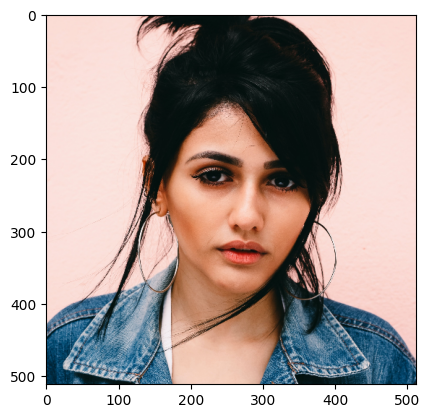

./input_img/resized/matheus-ferrero-W7b3eDUb_2I-unsplash_resized_0.jpg


In [8]:
extract_face('input_img/matheus-ferrero-W7b3eDUb_2I-unsplash.jpg')

In [9]:
image_list=read_img_path('./input_img')
image_list

['./input_img/elevate-nYgy58eb9aw-unsplash.jpg',
 './input_img/matheus-ferrero-W7b3eDUb_2I-unsplash.jpg',
 './input_img/naassom-azevedo-Q_Sei-TqSlc-unsplash.jpg',
 './input_img/amritansh-dubey--uo1ZhNE6b8-unsplash.jpg']

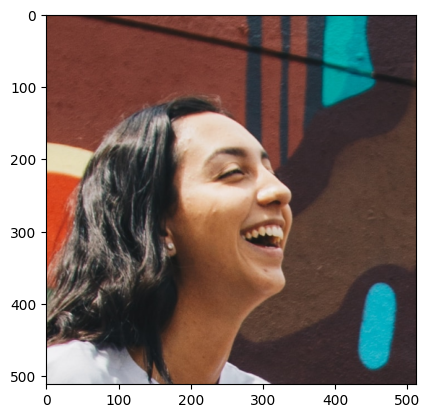

././input_img/resized/elevate-nYgy58eb9aw-unsplash_resized_0.jpg


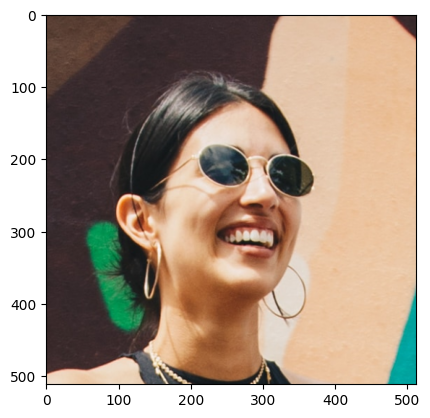

././input_img/resized/elevate-nYgy58eb9aw-unsplash_resized_1.jpg


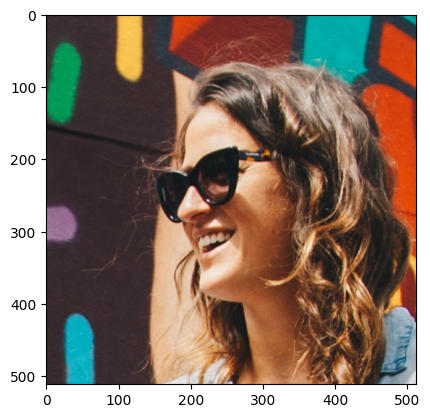

././input_img/resized/elevate-nYgy58eb9aw-unsplash_resized_2.jpg


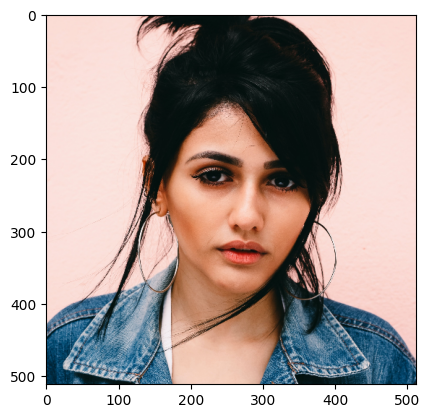

././input_img/resized/matheus-ferrero-W7b3eDUb_2I-unsplash_resized_0.jpg


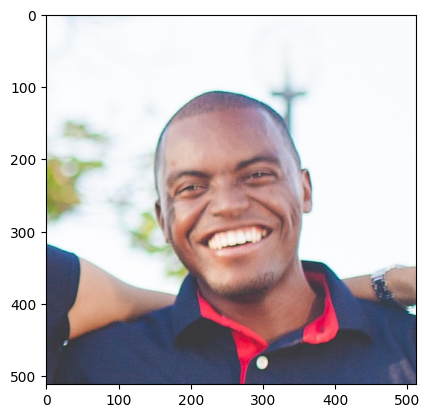

././input_img/resized/naassom-azevedo-Q_Sei-TqSlc-unsplash_resized_0.jpg


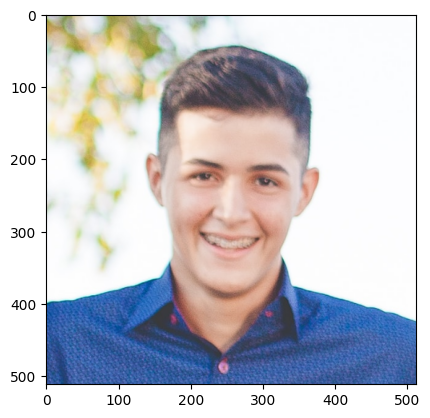

././input_img/resized/naassom-azevedo-Q_Sei-TqSlc-unsplash_resized_1.jpg


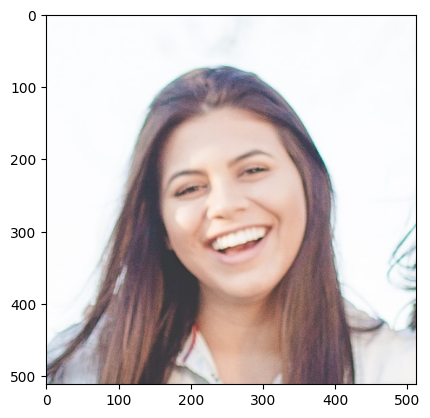

././input_img/resized/naassom-azevedo-Q_Sei-TqSlc-unsplash_resized_2.jpg


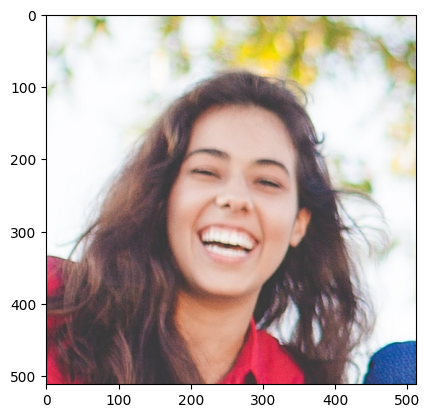

././input_img/resized/naassom-azevedo-Q_Sei-TqSlc-unsplash_resized_3.jpg


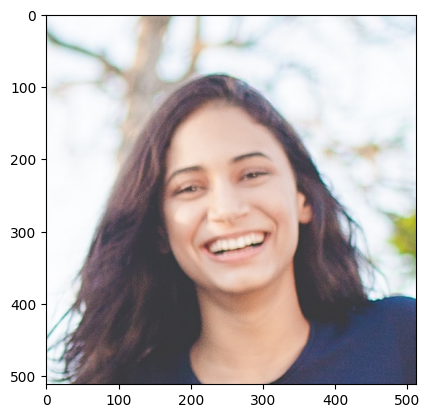

././input_img/resized/naassom-azevedo-Q_Sei-TqSlc-unsplash_resized_4.jpg
No face detected for image: ./input_img/amritansh-dubey--uo1ZhNE6b8-unsplash.jpg


In [10]:
for img_path in image_list:
    extract_face(img_path)  